# Wikipedia Pageviews Data Analysis

In this notebook, we perform an analysis on Wikipedia pageview data collected in Step 1. The objective is to create visualizations that allow us to explore key trends and insights from the dataset. Specifically, we'll generate time-series graphs focusing on three primary aspects: 
- Maximum and Minimum Average Page Views
- Top 10 Peak Page Views
- Articles with the Fewest Months of Data

Each of these analyses will help us better understand user behavior and attention across different rare disease articles on Wikipedia.


In [20]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.



# Step 2: Analysis

In this step, we’ll create a few graphs to analyze the Wikipedia pageview data collected in Step 1. The goal is to visualize some key trends from the data. We'll generate three graphs that focus on different aspects of the pageviews, making it easier to understand how these articles performed over time.

Each graph will be saved in the `images` folder for easy reference later.



## Maximum and Minimum Average Page Views

For this section, we identify the articles with the highest and lowest average page views, separately for desktop and mobile access. This allows us to see which articles are consistently attracting the most and least attention over the entire time period. The data is plotted as four separate lines representing the maximum and minimum average views for both desktop and mobile access.


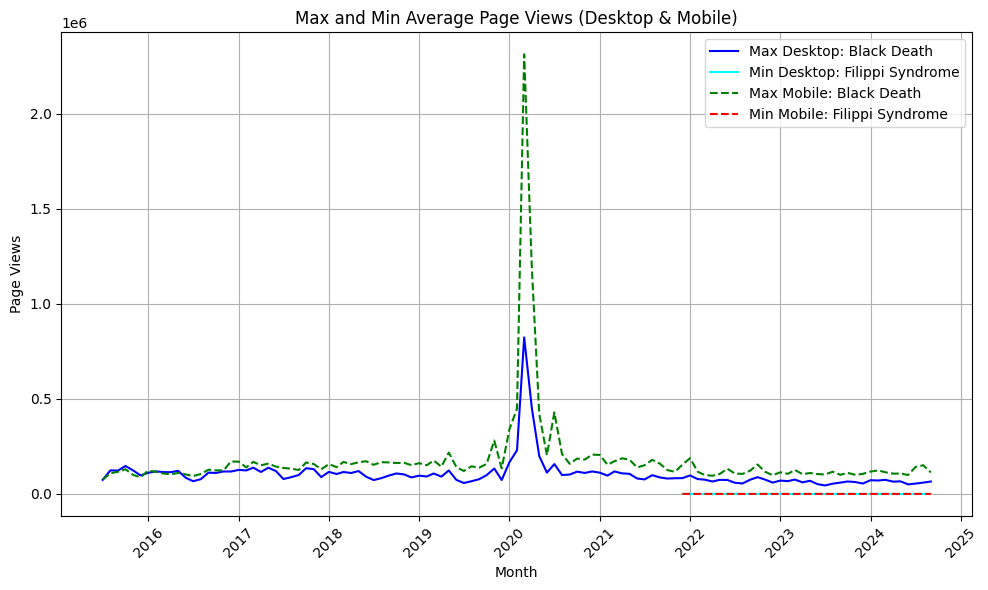

In [23]:
# Import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON data
with open('/Users/radhikasethi/Documents/github/data-512-homework_1/data/rare-disease_monthly_desktop_201507-202409.json') as f:
    desktop_data = json.load(f)
with open('/Users/radhikasethi/Documents/github/data-512-homework_1/data/rare-disease_monthly_mobile_201507-202409.json') as f:
    mobile_data = json.load(f)

# Converting the JSON data into pandas DataFrames
df_desktop = pd.DataFrame(desktop_data)
df_mobile = pd.DataFrame(mobile_data)

# Converting the 'timestamp' to datetime correctly (YYYYMMDD00 format) -- this has gone wrong many times! it would read some YYYY as 2033
df_desktop['timestamp'] = pd.to_datetime(df_desktop['timestamp'], format='%Y%m%d00')
df_mobile['timestamp'] = pd.to_datetime(df_mobile['timestamp'], format='%Y%m%d00')

# Calculating the average views per article
desktop_avg = df_desktop.groupby('article_title')['views'].mean()
mobile_avg = df_mobile.groupby('article_title')['views'].mean()

# Finding the max and min articles by average views
max_desktop_article = desktop_avg.idxmax()
min_desktop_article = desktop_avg.idxmin()
max_mobile_article = mobile_avg.idxmax()
min_mobile_article = mobile_avg.idxmin()

# Getting data for the max/min articles
df_max_desktop = df_desktop[df_desktop['article_title'] == max_desktop_article]
df_min_desktop = df_desktop[df_desktop['article_title'] == min_desktop_article]
df_max_mobile = df_mobile[df_mobile['article_title'] == max_mobile_article]
df_min_mobile = df_mobile[df_mobile['article_title'] == min_mobile_article]

# Plotting the max/min average page views for desktop and mobile
plt.figure(figsize=(10, 6))
plt.plot(df_max_desktop['timestamp'], df_max_desktop['views'], label=f'Max Desktop: {max_desktop_article}', linestyle='-', color='blue')
plt.plot(df_min_desktop['timestamp'], df_min_desktop['views'], label=f'Min Desktop: {min_desktop_article}', linestyle='-', color='cyan')
plt.plot(df_max_mobile['timestamp'], df_max_mobile['views'], label=f'Max Mobile: {max_mobile_article}', linestyle='--', color='green')
plt.plot(df_min_mobile['timestamp'], df_min_mobile['views'], label=f'Min Mobile: {min_mobile_article}', linestyle='--', color='red')

plt.title('Max and Min Average Page Views (Desktop & Mobile)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the plot as PNG in /images folder 
plt.savefig('/Users/radhikasethi/Documents/github/data-512-homework_1/images/max_min_average_views.png')
plt.show()


## Top 10 Peak Page Views

Here, we are focusing on the articles that saw the highest single-month spikes in page views, also known as peak views. We will identify the top 10 articles with the highest peaks for both desktop and mobile access. This graph allows us to observe moments of high user engagement and compare when these peaks occurred across platforms.


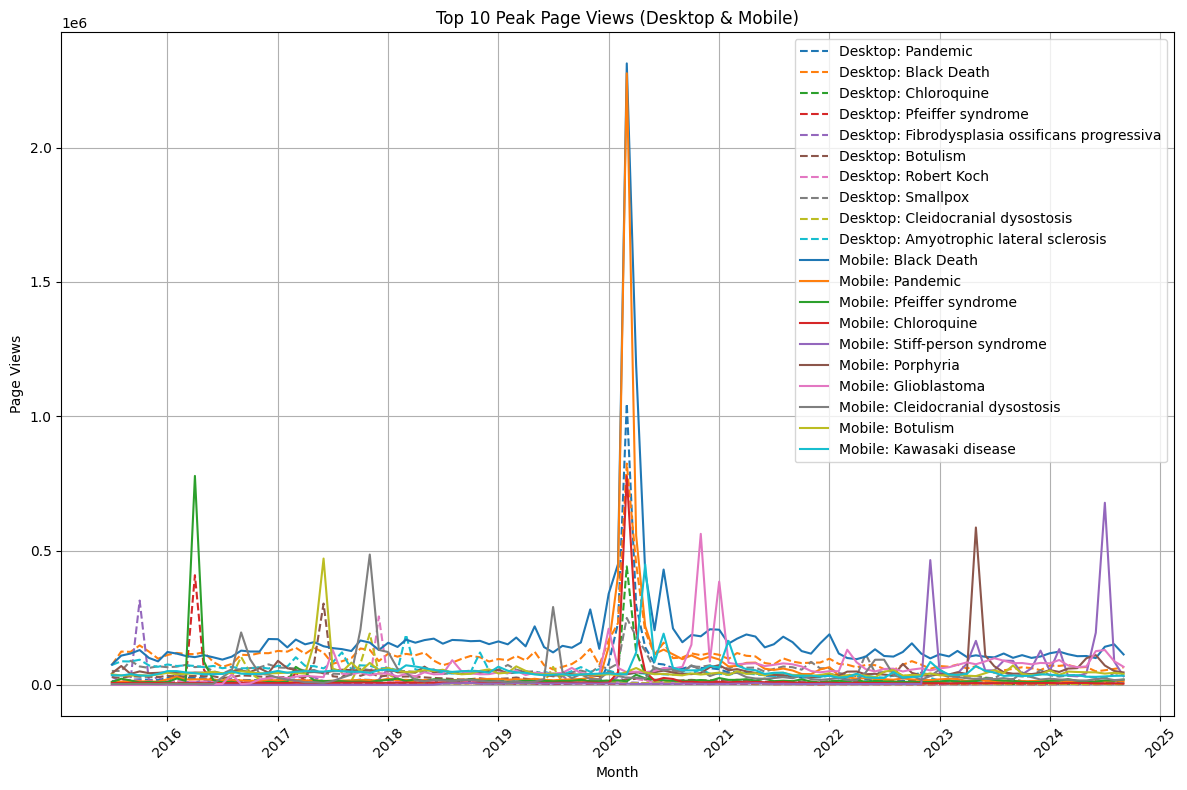

In [24]:
# Finding top 10 articles with the largest peak page views for desktop and mobile
desktop_peak = df_desktop.groupby('article_title')['views'].max().nlargest(10)
mobile_peak = df_mobile.groupby('article_title')['views'].max().nlargest(10)

# Filtering the data for these top 10 articles
df_top_desktop = df_desktop[df_desktop['article_title'].isin(desktop_peak.index)]
df_top_mobile = df_mobile[df_mobile['article_title'].isin(mobile_peak.index)]

# Plotting top 10 peak page views for desktop and mobile
plt.figure(figsize=(12, 8))

# Desktop data (dashed lines)
for article in desktop_peak.index:
    data = df_top_desktop[df_top_desktop['article_title'] == article]
    plt.plot(data['timestamp'], data['views'], label=f'Desktop: {article}', linestyle='--')

# Mobile data (solid lines)
for article in mobile_peak.index:
    data = df_top_mobile[df_top_mobile['article_title'] == article]
    plt.plot(data['timestamp'], data['views'], label=f'Mobile: {article}', linestyle='-')

plt.title('Top 10 Peak Page Views (Desktop & Mobile)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the plot as PNG
plt.savefig('/Users/radhikasethi/Documents/github/data-512-homework_1/images/top_10_peak_views.png')
plt.show()


## Articles with Fewest Months of Data

In this final analysis, we explore which articles have the least available data (i.e., the fewest months of recorded pageviews). This can help identify articles that were either created later in the timeframe or received minimal attention. We'll display the top 10 articles with the least data for both desktop and mobile access.


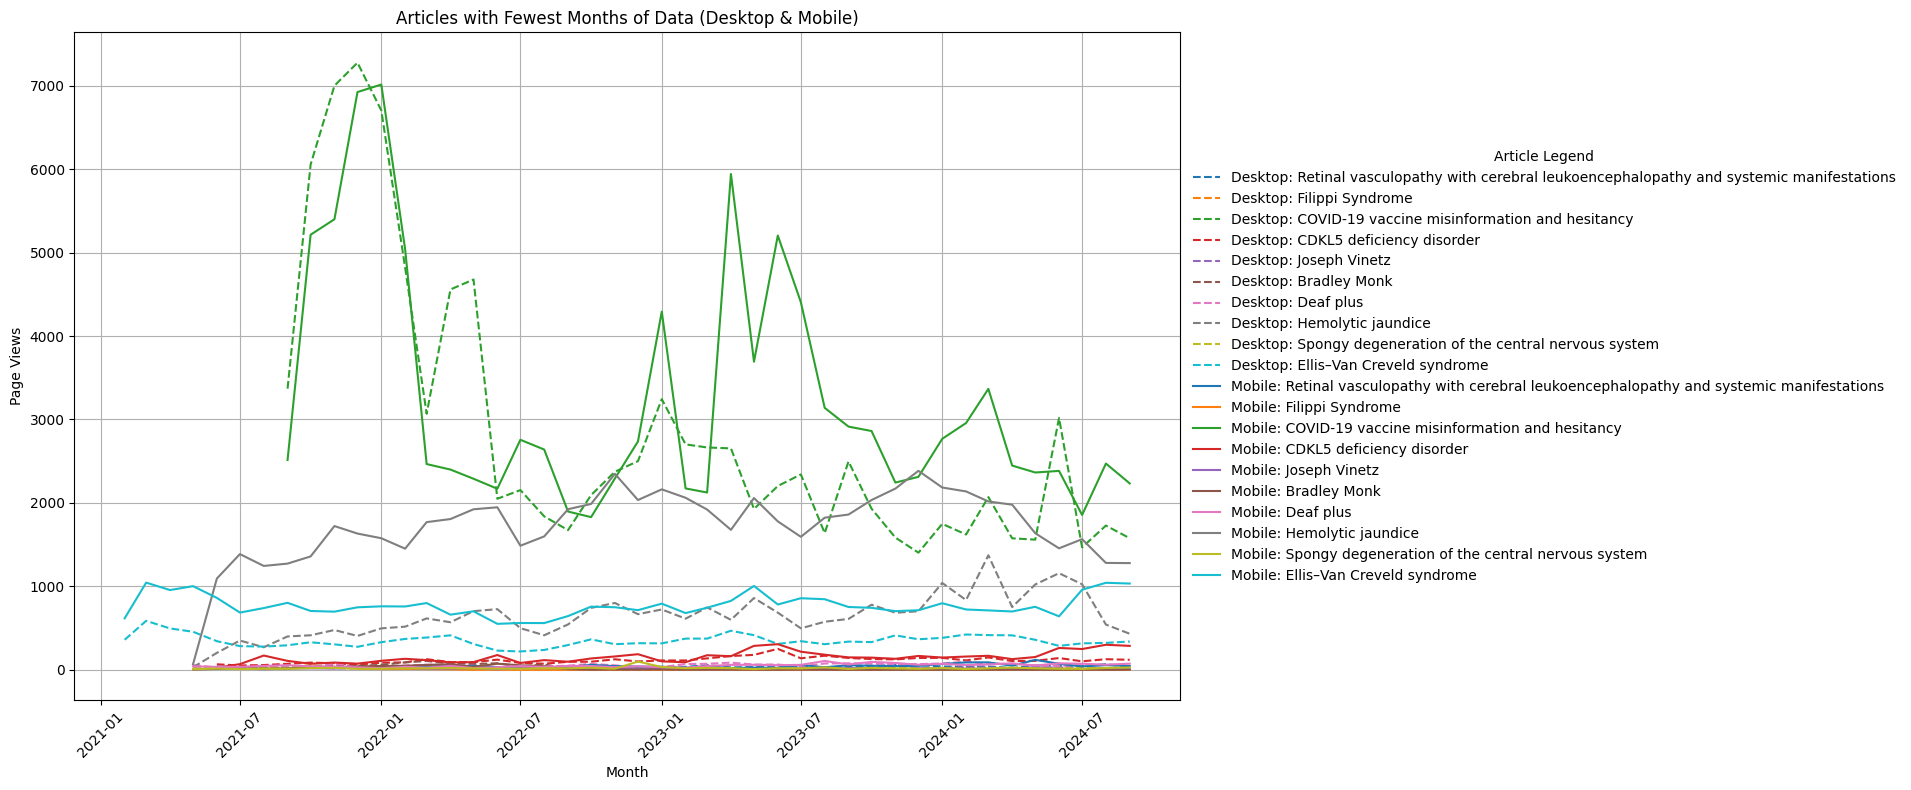

In [26]:
# Counting the number of months available for each article
desktop_fewest_months = df_desktop.groupby('article_title')['timestamp'].count().nsmallest(10)
mobile_fewest_months = df_mobile.groupby('article_title')['timestamp'].count().nsmallest(10)

# Filtering data for articles with the fewest months of data
df_fewest_desktop = df_desktop[df_desktop['article_title'].isin(desktop_fewest_months.index)]
df_fewest_mobile = df_mobile[df_mobile['article_title'].isin(mobile_fewest_months.index)]

# Plotting the fewest months of data for desktop and mobile
plt.figure(figsize=(12, 8))

# Desktop data (dashed lines) -- maintaining similarity as previous graphs
for article in desktop_fewest_months.index:
    data = df_fewest_desktop[df_fewest_desktop['article_title'] == article]
    plt.plot(data['timestamp'], data['views'], label=f'Desktop: {article}', linestyle='--')

# Mobile data (solid lines)
for article in mobile_fewest_months.index:
    data = df_fewest_mobile[df_fewest_mobile['article_title'] == article]
    plt.plot(data['timestamp'], data['views'], label=f'Mobile: {article}', linestyle='-')

plt.title('Articles with Fewest Months of Data (Desktop & Mobile)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Adjusting layout for the legend to avoid overlapping with the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Article Legend", frameon=False)

# Saving the plot as PNG
plt.savefig('/Users/radhikasethi/Documents/github/data-512-homework_1/images/fewest_months_data.png', bbox_inches='tight')
plt.show()



## Conclusion

In this notebook, we explored the Wikipedia pageview data by visualizing different trends across articles. By analyzing the maximum and minimum average page views, top peak views, and articles with the fewest months of data, we gained insights into the popularity and coverage of various rare disease articles. These visualizations offer a valuable perspective on user interest and engagement over time across both desktop and mobile platforms.
